# Data Generation and Preprocessing

We will take the following steps to preprocess the data
1. Match data with the corresponding labels in one dataframe
2. Join train and validation data
3. transform input data and create column text: Premist + Conclusion + Stance
3. Create Leave-One-Out DataSet to calculate the best threshold of the final ensemble (This is optional, but used in the best-performing system in the competiton)

Input: arguments-training.tsv, arguments-validation.tsv
Output: train_full.csv, leave_one_out_dataset.csv



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from toolbox.data_preprocessing import create_data_file

Prepare dataset by merging arguments and labels and concatenating

In [3]:
data_path = "./data/"

train_df = create_data_file(data_path + "arguments-training.tsv", data_path + "labels-training.tsv", data_path + "arg_training_label_task.csv")
val_df = create_data_file(data_path + "arguments-validation.tsv", data_path + "labels-validation.tsv", data_path + "arg_training_label_task.csv")

In [4]:
train_df = pd.concat([train_df, val_df], ignore_index=True)
train_df.head()

,Argument ID,Conclusion,Stance,Premise,text,category,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,we should ban human cloning as it will only ca...,[Security: societal],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,fast food should be banned because it is reall...,[Security: personal],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer...",0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ...",0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Create a Leave-Out-Dataset which is can then later be used to determine the optimal decision threshold

In [5]:
train_df, leave_out_dataset = train_test_split(train_df, test_size=300, random_state=42)

Save your files created training data

In [6]:
leave_out_dataset.to_csv(data_path + "leave_out_dataset_300.csv") #It is important to save the leave_out_dataset once
train_df.to_csv(data_path + "data_training_full.csv")

### Analyses Dataset

<Axes: >

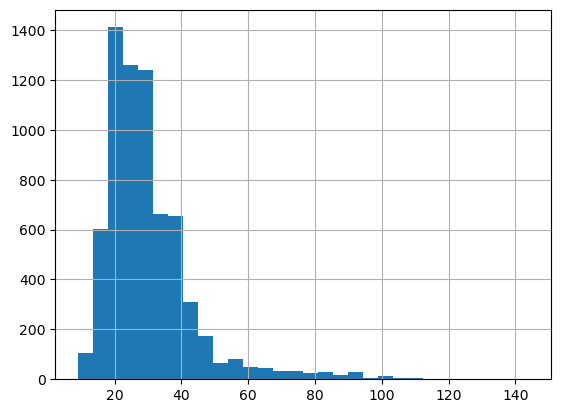

In [9]:
train_df = pd.read_csv(data_path + "data_training_full.csv")
seq_len = [len(str(text).split()) for text in train_df["text"]]
pd.Series(seq_len).hist(bins=30)